In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
# Data Preprocessing
# Training Image preprocessing
training_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/dell/Downloads/archive (2)/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

Found 70295 files belonging to 38 classes.


In [5]:
# Validation Image Preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/dell/Downloads/archive (2)/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

Found 17572 files belonging to 38 classes.


In [6]:
# Building the CNN Model
cnn = tf.keras.models.Sequential()

In [7]:
# Adding Convolutional Layers
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [8]:
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())

In [9]:
# Adding Dense Layers
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))  # To avoid overfitting

In [10]:
# Output Layer
cnn.add(tf.keras.layers.Dense(units=38, activation='softmax'))

In [11]:
# Compiling the Model
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [12]:
# Model Summary
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [13]:
# Training the Model
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10


2197/2197 [==============================] - 2917s 1s/step - loss: 1.4969 - accuracy: 0.5605 - val_loss: 0.5762 - val_accuracy: 0.8174
Epoch 2/10
2197/2197 [==============================] - 3490s 2s/step - loss: 0.4970 - accuracy: 0.8410 - val_loss: 0.3490 - val_accuracy: 0.8870
Epoch 3/10
2197/2197 [==============================] - 3094s 1s/step - loss: 0.2844 - accuracy: 0.9073 - val_loss: 0.1918 - val_accuracy: 0.9372
Epoch 4/10
2197/2197 [==============================] - 2188s 996ms/step - loss: 0.2002 - accuracy: 0.9344 - val_loss: 0.2401 - val_accuracy: 0.9241
Epoch 5/10
2197/2197 [==============================] - 2440s 1s/step - loss: 0.1502 - accuracy: 0.9508 - val_loss: 0.1662 - val_accuracy: 0.9462
Epoch 6/10
2197/2197 [==============================] - 3157s 1s/step - loss: 0.1150 - accuracy: 0.9617 - val_loss: 0.1517 - val_accuracy: 0.9515
Epoch 7/10
2197/2197 [==============================] - 2341s 1s/step - loss: 0.0923 - accuracy: 0.9694 - val_loss: 0.1

In [14]:
# Evaluating Model
# Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 527s 240ms/step - loss: 0.0358 - accuracy: 0.9883
Training accuracy: 0.9883490800857544


In [15]:
# Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 140s 254ms/step - loss: 0.1285 - accuracy: 0.9618
Validation accuracy: 0.9617573618888855


In [16]:
# Saving the Model
cnn.save('trained_plant_disease_model.keras')

In [17]:
# Saving Training History to JSON
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

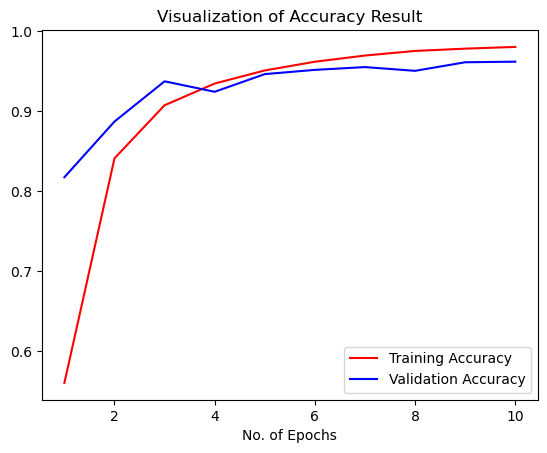

In [18]:
# Accuracy Visualization
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [19]:
# Evaluating on the Validation Set
class_name = validation_set.class_names
test_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/dell/Downloads/archive (2)/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

Found 17572 files belonging to 38 classes.


In [20]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

17572/17572 [==============================] - 669s 38ms/step


In [21]:
# Classification Report
print(classification_report(Y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.87      0.97      0.92       504
                                 Apple___Black_rot       0.98      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.98       440
                                   Apple___healthy       0.99      0.85      0.91       502
                               Blueberry___healthy       0.98      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.95      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.96      0.

In [22]:
# Confusion Matrix
cm = confusion_matrix(Y_true, predicted_categories)

<Axes: >

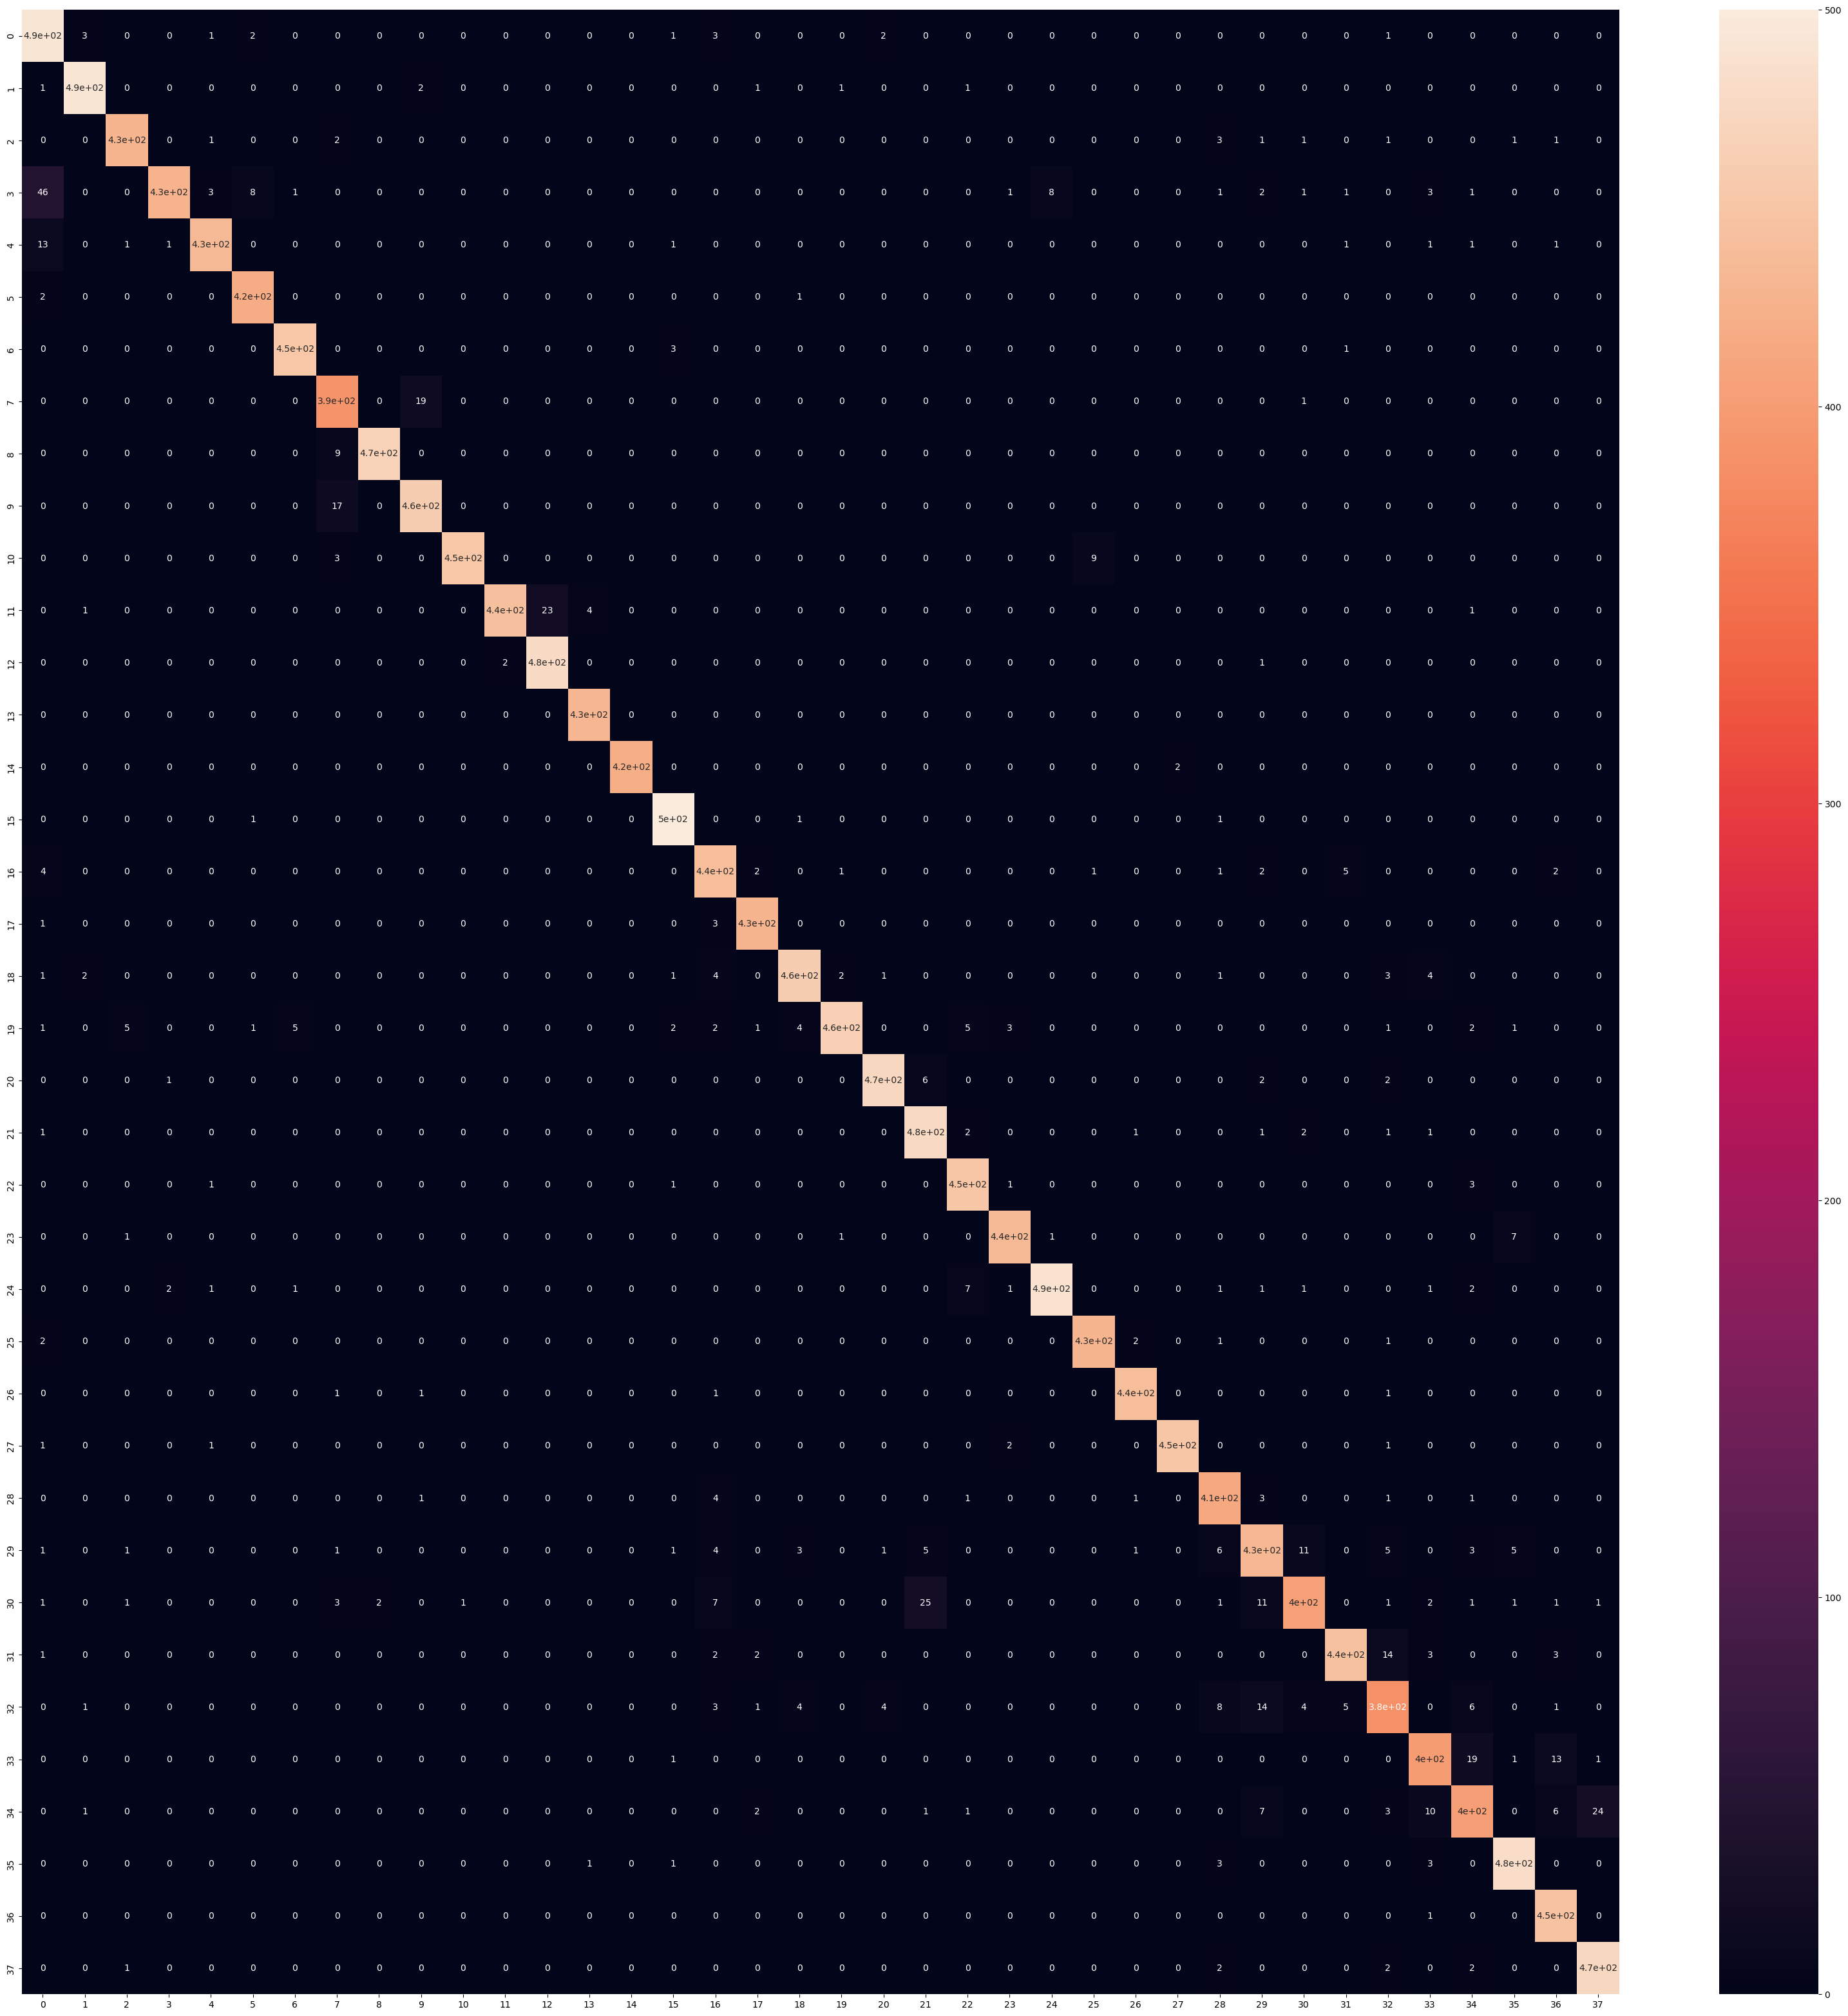

In [23]:
# Confusion Matrix Visualization
plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, annot_kws={"size": 10})